In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline
from sklearn import datasets
plt.style.use('seaborn') 

In [7]:
X,y = datasets.make_moons(n_samples=200, shuffle=True, noise=0.2, random_state=1234)
y = np.reshape(y, (len(y),1))

In [8]:
input_size = 2 
hidden_size = 3 # randomly chosen
output_size = 1 # we want it to return a number that can be used to calculate the difference from the actual number
class NeuralNetwork():
    def __init__(self, input_size, hidden_size, output_size):
# weights 
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W2 = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.W3 = torch.randn(hidden_size, output_size, requires_grad=True)
# Add bias
        self.b1 = torch.randn(hidden_size, requires_grad=True)
        self.b2 = torch.randn(hidden_size, requires_grad=True)
        self.b3 = torch.randn(output_size, requires_grad=True)
    def forward(self, inputs):
        z1 = inputs.mm(self.W1).add(self.b1)
        a1 = 1 / (1 + torch.exp(-z1))
        z2 = a1.mm(self.W2).add(self.b2)
        a2 = 1 / (1 + torch.exp(-z2))
        z3 = a2.mm(self.W3).add(self.b3)
        output = 1 / (1 + torch.exp(-z3))
        return output

In [9]:
epochs = 10000
learning_rate = 0.005
model = NeuralNetwork(input_size, hidden_size, output_size)
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)
#store all the loss values
losses = []

Final loss:  nan


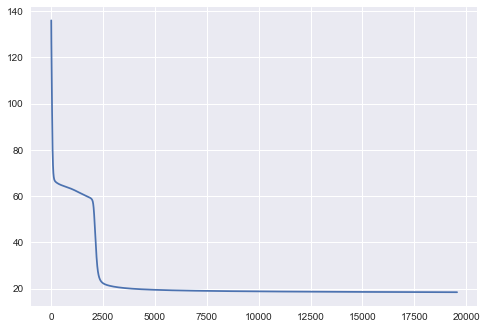

In [11]:
for epoch in range(epochs):
# forward function
    output = model.forward(inputs)
#BinaryCrossEntropy formula
    loss = -((labels * torch.log(output)) + (1 - labels) * torch.log(1 - output)).sum()
#Log the log so we can plot it later
    losses.append(loss.item())
#calculate the gradients of the weights wrt to loss
    loss.backward()
#adjust the weights based on the previous calculated gradients
    model.W1.data -= learning_rate * model.W1.grad
    model.W2.data -= learning_rate * model.W2.grad
    model.W3.data -= learning_rate * model.W3.grad
    model.b1.data -= learning_rate * model.b1.grad
    model.b2.data -= learning_rate * model.b2.grad
    model.b3.data -= learning_rate * model.b3.grad
#clear the gradients so they wont accumulate
    model.W1.grad.zero_()
    model.W2.grad.zero_()
    model.W3.grad.zero_()
    model.b1.grad.zero_()
    model.b2.grad.zero_()
    model.b3.grad.zero_()
print("Final loss: ", losses[-1])
plt.plot(losses)

In [13]:
print(inputs)
labels

tensor([[ 1.7934e+00,  5.4295e-01],
        [ 1.0293e+00, -8.0841e-01],
        [ 9.7668e-01,  7.4244e-01],
        [ 4.8576e-02,  1.0272e+00],
        [-5.3963e-01,  8.8252e-01],
        [-2.7119e-01,  8.6280e-01],
        [ 9.8413e-01,  1.3817e-01],
        [ 9.7340e-01,  2.0710e-01],
        [ 4.0557e-01, -3.1812e-01],
        [-1.4838e-02,  2.4104e-01],
        [ 4.5438e-01, -5.5019e-01],
        [ 1.5936e-01,  1.0221e+00],
        [ 1.7430e-01,  1.1201e+00],
        [ 4.1772e-01, -4.6699e-01],
        [ 1.7437e+00, -2.1321e-01],
        [ 7.8087e-01, -3.6733e-01],
        [ 4.0932e-01, -2.0677e-01],
        [ 6.3699e-01,  7.7362e-01],
        [-3.7917e-01,  7.4848e-01],
        [ 2.6021e-02,  9.9935e-01],
        [ 4.7375e-01, -4.6561e-01],
        [ 3.2100e-01,  5.0527e-01],
        [ 1.9242e+00,  3.0968e-01],
        [ 2.4514e-01,  9.4491e-01],
        [-7.7347e-01,  2.6012e-01],
        [-1.3831e-01, -2.2342e-01],
        [ 1.0212e+00,  3.5983e-01],
        [ 8.5717e-02, -4.495

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
      